In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from scipy import ndimage, misc
from skimage.feature import canny
from skimage.transform import rescale, resize, downscale_local_mean
from matplotlib import cm

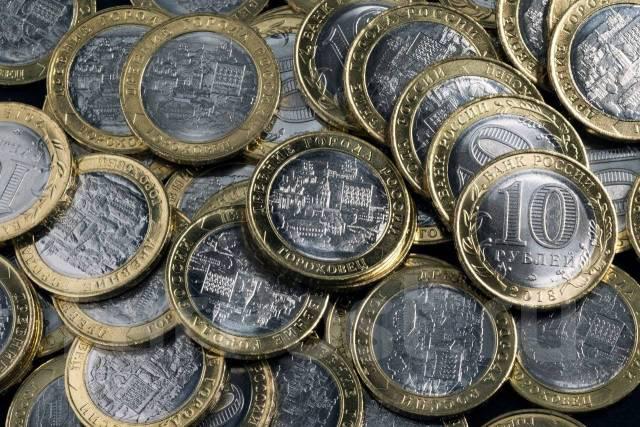

In [ ]:
image = Image.open('coins.jpg')
image

In [ ]:
#преобразование в серое изображение
pix = image.load()
img = np.array([[int((pix[x,y][0]+pix[x,y][1]+pix[x,y][2])/3)
for x in range(image.size[0])] for y in range(image.size[1])])

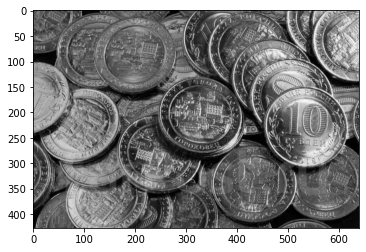

In [ ]:
plt.imshow(img)

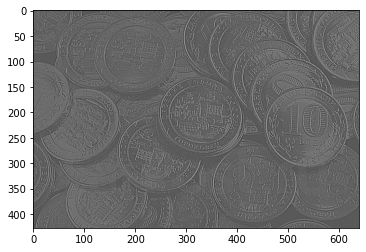

In [ ]:
#создание матрицы свертки
k = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
#применение матрицы свертки
plt.gray()
result = ndimage.convolve(img, k)
plt.imshow(result)

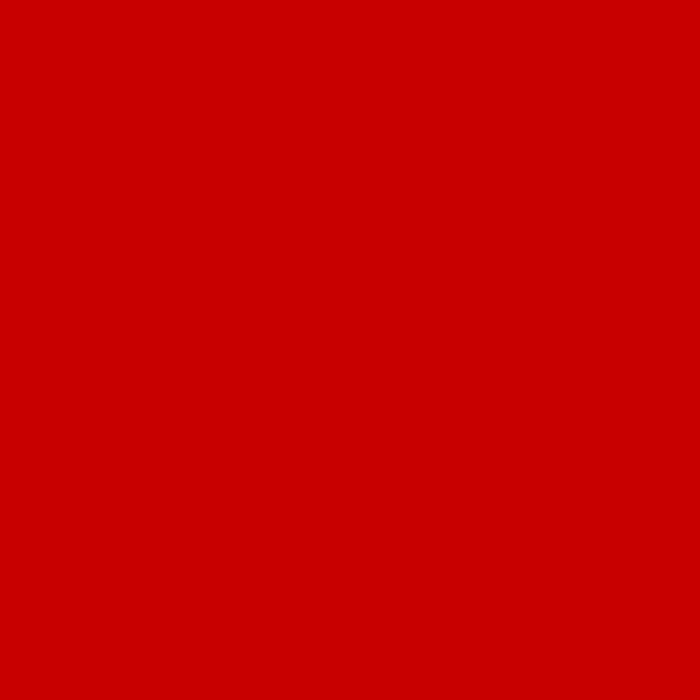

In [ ]:
new = Image.new(color = 200, size = (700, 700), mode = "RGB")
new

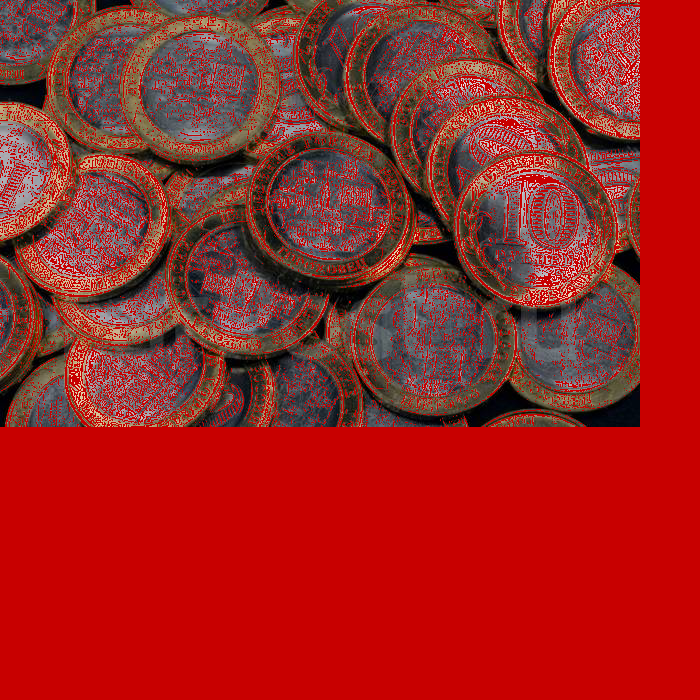

In [ ]:
result = np.array(result)
image = np.array(image)
#new = Image.new(color = 200, size = (700, 700), mode = "RGB")
#new
new = np.array(new)
for i in range(np.array(result).shape[0]):
  for j in range(np.array(result).shape[1]):
    if np.array(result)[i][j] < 100:
      new[i][j] = image[i][j]
#new.paste(result)
#new
Image.fromarray(new)

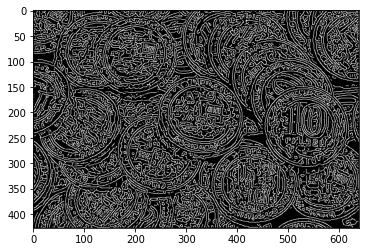

In [ ]:
#выделение границ
edges = canny(result, 2, 1, 25)
type(edges)
plt.imshow(edges)

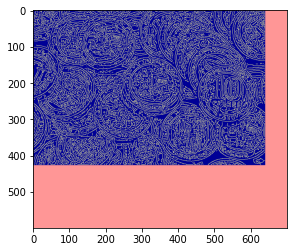

In [ ]:
colour = img2.load()
new = np.array([[[colour[x,y][0], colour[x,y][1], colour[x,y][2]] for x in range(img2.size[0])]
                 for y in range(img2.size[1])])
for i in range(0, image.size[1]):
  for j in range(0, image.size[0]):
    for k in range(0,2):
      if edges[i][j]==True:
        new[i][j][k]=255
      else:
        new[i][j][k]=0
plt.imshow(new)